## Problem Statement

**Context**

**Part A:**

A communications equipment manufacturing company has a product that is responsible for emitting informative signals.
The company wants to build a machine learning model that can help the company predict the equipment’s signal quality using various parameters.

**Part B:**

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project, we will use the dataset with images centered around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractor.


### Objective

**Part A:** To build a classifier that can use the given parameters to determine the signal strength or quality.

**Part B:** To build a digit classifier on the SVHN (Street View Housing Number) dataset.
Do the users spend more time on the new landing page than on the existing


### Data Dictionary

**Part A**
- Parameters: Various measurable signal parameters.
- Signal_Quality: Final signal strength or quality.

**Part B**

The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of these images are the prominent number in that image, i.e., 2, 6, 7, and 4, respectively. The dataset has been provided in the form of h5py files.

#### Part A - Q1 A - Read the 'Signals.csv' as DatFrame and import required libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

#Load data from google drive
pdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Neural Network/NN Project Data - Signal.csv")
# Display data
print(pdata.head())

   Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           

#### Part A - Q1 B - Check for missing values and print percentage for each attribute.

In [3]:
missing_vals = pdata.isnull().sum() / len(pdata) * 100
print("Missing values for each attribute in Percentage:")
print(missing_vals)

Missing values for each attribute in Percentage:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


There are no missing values

#### Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [4]:

dup_recs = pdata.duplicated().sum()
print("Number of duplicate records:", dup_recs)

# Imputation - Removing duplicates if any
data = pdata.drop_duplicates()


Number of duplicate records: 240


#### Part A - Q1 D - Visualise distribution of the target variable.

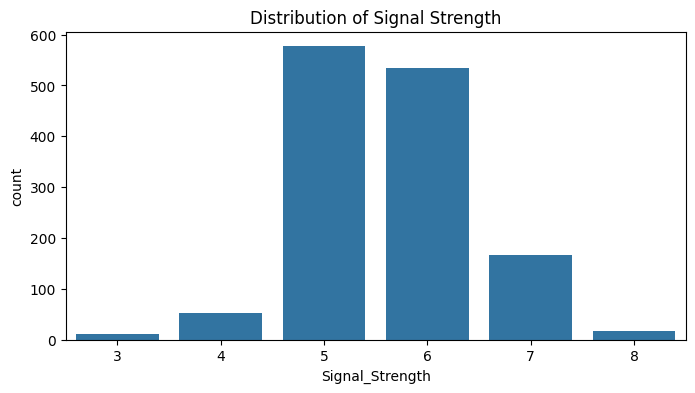

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Signal_Strength', data=data)
plt.title('Distribution of Signal Strength')
plt.show()


#### Part A - Q1 E - Share insights from the initial data analysis (at least 2).

                  count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

           

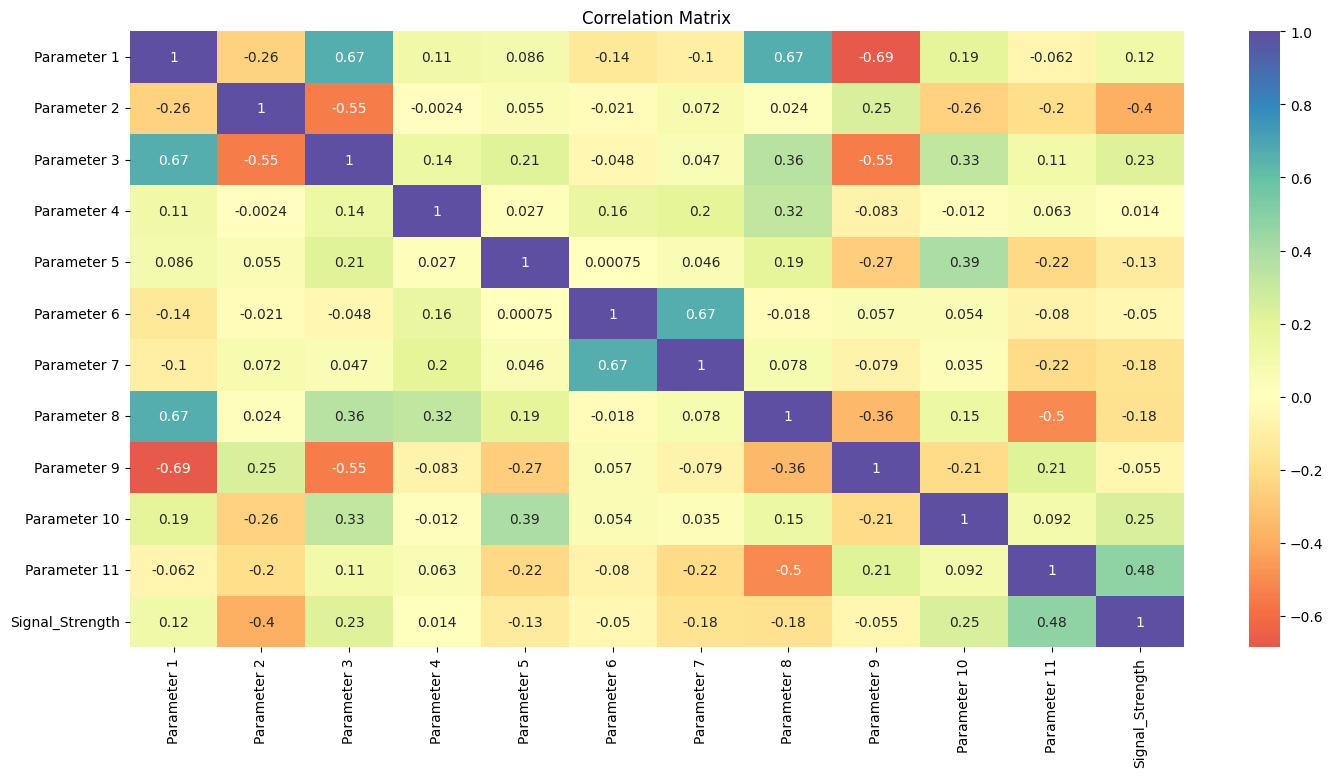

In [6]:
#Describe the data
print(data.describe().T)

# Correlation matrix
correlation = data.corr()

# Plot the heatmap
plt.figure(figsize=(17, 8))
sns.heatmap(correlation, annot=True, cmap='Spectral', center=0)
# 'coolwarm' is a diverging colormap: negative correlations are blue, positives are red
plt.title('Correlation Matrix')
plt.show()

**Insights from Statistics and Correlation Matrix:**
- Parameter 1 and Parameter 8 and Parameter 3 has highly positive correlation.This means that as Parameter 1 increases, Parameter 8 and Parameter 3 also tend to increase, and vice-versa,i.e Signal_Strength exhibits positive correlations with several parameters, primarily Parameters 1, 3, and 8. This means these parameters play a more significant role in influencing the signal strength.
- Parameter 7 and Parameter 6 also has strong positive correlation. These parameters likely have a strong relationship and influence each other's behavior.
- Parameter 2 and Parameter 4 have a negative correlation, though not as strong as the positive ones mentioned. This implies an inverse relationship where one tends to decrease when the other increases.
- Parameter 5 and 9 have a very weak correlation with other parameters. This could mean that these parameters are less dependent on other factors in the dataset.

#### Part A - Q2 A - Split the data into X & Y.

In [7]:
X = data.drop('Signal_Strength', axis=1)
Y = data['Signal_Strength']

#### Part A - Q2 B - Split the data into train & test with 70:30 proportion.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


#### Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [9]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

train_counts = Y_train.value_counts()
print("Data counts in the training set:")
print(train_counts)

# For test set
test_counts = Y_test.value_counts()
print("Data counts in the test set:")
print(test_counts)

X_train shape: (951, 11)
X_test shape: (408, 11)
Y_train shape: (951,)
Y_test shape: (408,)
Data counts in the training set:
Signal_Strength
5    410
6    363
7    123
4     34
8     14
3      7
Name: count, dtype: int64
Data counts in the test set:
Signal_Strength
6    172
5    167
7     44
4     19
3      3
8      3
Name: count, dtype: int64


In [10]:
# Total number of instances in training set
total_train_instances = train_counts.sum()

# Total number of instances in test set
total_test_instances = test_counts.sum()

# Proportions for training set
train_proportions = train_counts / total_train_instances

# Proportions for test set
test_proportions = test_counts / total_test_instances

print("Data Proportions in Training Set:")
print(train_proportions)
print("Data Proportions in Test Set:")
print(test_proportions)

Data Proportions in Training Set:
Signal_Strength
5    0.431125
6    0.381703
7    0.129338
4    0.035752
8    0.014721
3    0.007361
Name: count, dtype: float64
Data Proportions in Test Set:
Signal_Strength
6    0.421569
5    0.409314
7    0.107843
4    0.046569
3    0.007353
8    0.007353
Name: count, dtype: float64


- The proportions of each class (or value of Signal_Strength) are roughly the same in both the training and test sets, which indicates a good split
- X_train has 951 samples with 11 features each. X_test has 408 samples with 11 features each. Y_train has 951 labels. Y_test has 408 labels. Based on these shapes, it looks like the datasets are in sync.

#### Part A - Q2 D - Normalise the train and test data with appropriate method.

In [11]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Part A - Q2 E - Transform Labels into format acceptable by Neural Network

In [12]:
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit LabelBinarizer on the combined set of labels (train and test)
labels = pd.concat([Y_train, Y_test])
label_binarizer.fit(labels)

# Transform training labels to one-hot encoded format
Y_train_encoded = label_binarizer.transform(Y_train)

# Transform test labels to one-hot encoded format
Y_test_encoded = label_binarizer.transform(Y_test)

#### Part A - Q3 A - Design a Neural Network to train a classifier.

In [13]:
!pip install tensorflow

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Number of input features
input_shape = X_train.shape[1]

# Number of classes
num_classes = len(pd.unique(Y_train))
# Initialize a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(64, input_dim=input_shape, activation='relu'))  # 64 neurons, 'ReLU' activation

# Add one or more hidden layers
model.add(Dense(32, activation='relu'))  # 32 neurons, 'ReLU' activation

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for multiclass classification

# Compile and configures the learning process of the model
model.compile(loss='categorical_crossentropy',  # Cross-entropy loss function
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Evaluation metric

# Print the summary of the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,046 (11.90 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

#### Part A - Q3 B - Train the classifier using previously designed Architecture

In [15]:

# Train the model
history = model.fit(X_train, Y_train_encoded,
                    epochs=100,  # Adjust the number of epochs as needed
                    batch_size=128,  # Adjust the batch size as needed
                    validation_data=(X_test, Y_test_encoded))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test_encoded)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.0724 - loss: 8.4940 - val_accuracy: 0.3627 - val_loss: 2.9746
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3710 - loss: 2.6272 - val_accuracy: 0.4240 - val_loss: 2.3446
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4768 - loss: 1.9236 - val_accuracy: 0.4510 - val_loss: 1.9038
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4588 - loss: 1.6372 - val_accuracy: 0.4044 - val_loss: 1.7236
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4300 - loss: 1.4665 - val_accuracy: 0.4142 - val_loss: 1.6063
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4474 - loss: 1.4021 - val_accuracy: 0.4583 - val_loss: 1.5178
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4733 - loss: 1.2957 - val_accuracy: 0.4779 - val_loss: 1.4390
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4548 - loss: 1.2991 - val_accuracy: 0.4657 - val_loss:

#### Part A - Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy

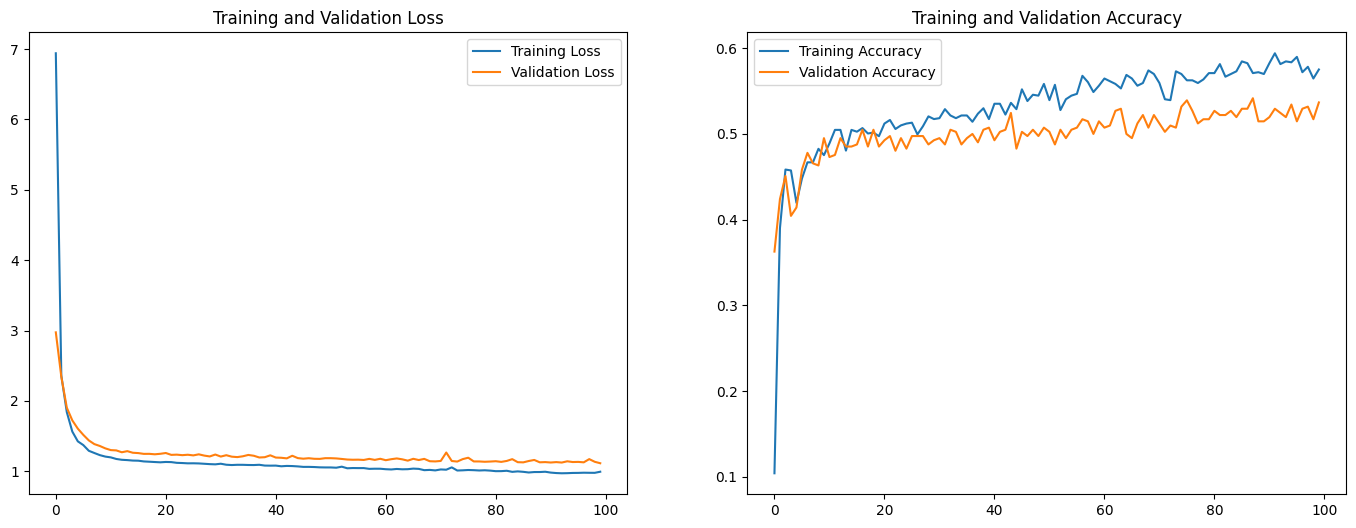

In [16]:
plt.figure(figsize=(17, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

#### Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [17]:
# This function makes it easier to build and experiment with different neural network architectures by providing flexibility in terms of the number of layers, neurons, and dropout rate.
# Function to create the NN model
def nnModel(hidden_layers=4, neurons=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_shape, activation='relu'))
    model.add(BatchNormalization())  # Adding BatchNormalization layer
    model.add(Dropout(dropout_rate))  # Adding Dropout layer
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())  # Adding BatchNormalization layer
        model.add(Dropout(dropout_rate))  # Adding Dropout layer
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',  # Using Adam optimizer
                  metrics=['accuracy'])
    return model

In [18]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# Create Keras model with modified architecture
modelnn = nnModel()

# Train the model and evaluate performance
historynew = modelnn.fit(X_train, Y_train_encoded, epochs=100, batch_size=64, validation_data=(X_test, Y_test_encoded))

# Evaluate model on test data
test_loss, test_accuracy = modelnn.evaluate(X_test, Y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.1934 - loss: 2.8324 - val_accuracy: 0.4118 - val_loss: 2.0805
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2532 - loss: 2.4777 - val_accuracy: 0.4240 - val_loss: 2.1092
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2487 - loss: 2.3335 - val_accuracy: 0.4853 - val_loss: 1.9966
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2872 - loss: 2.2824 - val_accuracy: 0.5000 - val_loss: 1.9357
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3041 - loss: 2.0599 - val_accuracy: 0.5025 - val_loss: 1.8569
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3383 - loss: 1.9673 - val_accuracy: 0.5196 - val_loss: 1.7796
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3556 - loss: 1.9049 - val_accuracy: 0.5098 - val_loss: 1.7292
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3977 - loss: 1.7572 - val_accuracy: 0

#### Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.

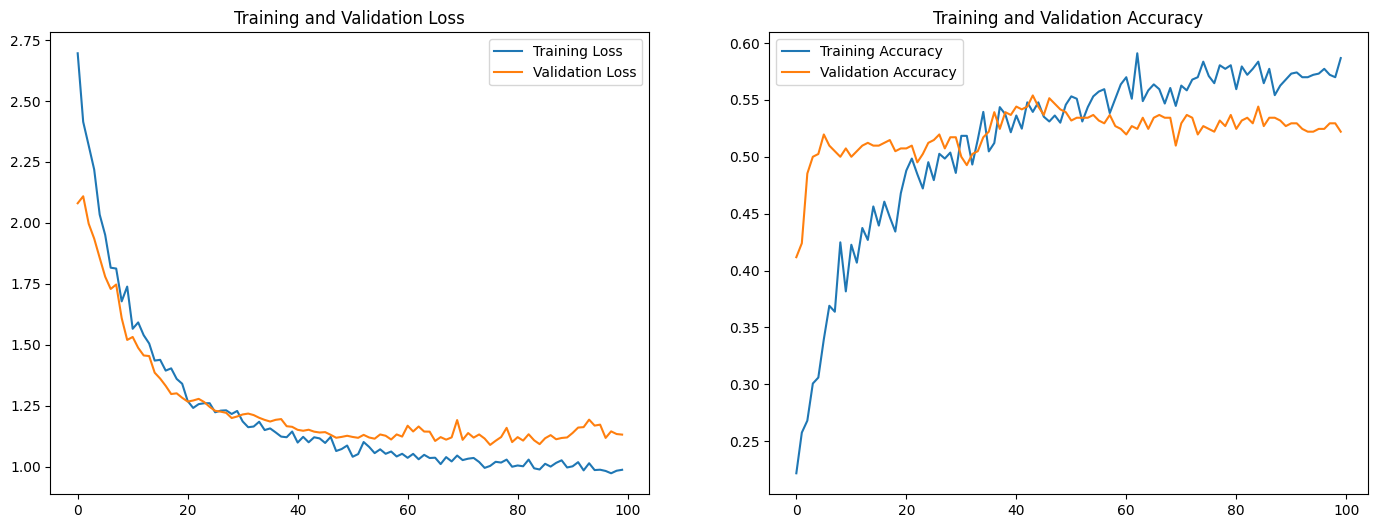

In [19]:
plt.figure(figsize=(17, 6))

plt.subplot(1, 2, 1)
plt.plot(historynew.history['loss'], label='Training Loss')
plt.plot(historynew.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historynew.history['accuracy'], label='Training Accuracy')
plt.plot(historynew.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

**Model Training Observations and Insights**

**Loss Graph Analysis:**

- Both models show decreasing training and validation losses over epochs, indicating learning.
- Validation loss closely tracks training loss in both models, indicating strong generalization without considerable overfitting.
- The first graph has higher loss values than the second, indicating that the model represented in the second graph may do better in fitting the data.

**Accuracy Graph Analysis:**
- Training accuracy always exceeds validation accuracy in both models. Models are optimized for the data on which they are trained, therefore this is not uncommon.
- The first graph shows more variability in validation accuracy, indicating potential instability in the model's learning process or the need for hyperparameter tuning.
- The second graph exhibits a smoother and more stable improvement in accuracy, which is usually indicative of a better learning process

**Model Comparison:**

- Model A is more prone to overfitting than Model B:
If Model A's validation loss starts to increase earlier and its validation accuracy plateaus or decreases sooner than Model B's, it suggests that Model A is overfitting more quickly.
- Model B generalizes better: If Model B achieves higher validation accuracy and lower validation loss, it indicates better generalization performance and is likely to perform better on unseen data.
- Model A converges faster but overfits: If Model A reaches a lower training loss and higher training accuracy quicker than Model B but shows signs of overfitting, it might suggest that Model A is too complex for the given data.
- Model B is more stable: If Model B's validation metrics show less fluctuation during training, it indicates that the model is more robust and reliable.

#### Part B - Q1 A - Read the .h5 file and assign to a variable.

In [20]:
import h5py

# Read h5 the file
h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/Neural Network/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

#### Part B - Q1 B - Print all the keys from the .h5 file.

In [21]:
# Print the keys
for key in h5f.keys():
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


#### Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test

In [22]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Split the data
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [23]:
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [24]:
y_train[:1]

array([2], dtype=uint8)

In [25]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [26]:
y_test[:1]

array([1], dtype=uint8)

In [27]:
X_train.shape


(42000, 32, 32)

In [28]:
y_train.shape

(42000,)

#### Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.

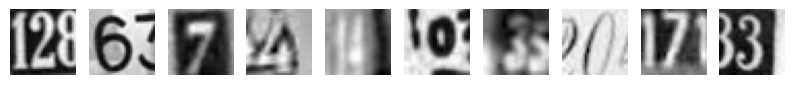

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [29]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

#### Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.

In [30]:
# Since the labels are already in the correct format (single values representing the digit class), there's no need for this transformation.
y_train = y_train.astype(int)
y_test = y_test.astype(int)


#### Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [31]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 32, 32) (42000,)
Resized Test set (18000, 32, 32) (18000,)


#### Part B - Q2 E - Transform Labels into format acceptable by Neural Network

To improve the model's comprehension of the labels, we must first hot encode them. We require our labels to be in a single hot encoded format in order to use categorical cross entropy as our loss function.

In [32]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)




#### Part B - Q2 F - Print total Number of classes in the Dataset.

In [33]:
# total Number of classes in the Dataset
num_classes = y_test.shape[1]
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


#### Part B - Q3 A - Design a Neural Network to train a classifier.

In [34]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

 # create model
def nn_model():
    model = Sequential()  #Creates an instance of the Sequential model,
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) # Adds a Dense layer with 256 neurons and the 'ReLU'
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))#Adds the final Dense layer with softmax
    return model

In [35]:
# build the model
model = nn_model()

In [36]:
# Compile model
adm = optimizers.Adam(learning_rate=1e-3)
#using Categorical cross entropy for loss function
model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])

#### Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).

In [37]:
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)


Epoch 1/100
140/140 - 6s - 43ms/step - accuracy: 0.1392 - loss: 2.2696 - val_accuracy: 0.2029 - val_loss: 2.1330
Epoch 2/100
140/140 - 2s - 17ms/step - accuracy: 0.2887 - loss: 1.9298 - val_accuracy: 0.3566 - val_loss: 1.7603
Epoch 3/100
140/140 - 2s - 14ms/step - accuracy: 0.4242 - loss: 1.6477 - val_accuracy: 0.4751 - val_loss: 1.5493
Epoch 4/100
140/140 - 3s - 19ms/step - accuracy: 0.5169 - loss: 1.4508 - val_accuracy: 0.5654 - val_loss: 1.3387
Epoch 5/100
140/140 - 3s - 24ms/step - accuracy: 0.5781 - loss: 1.3039 - val_accuracy: 0.6011 - val_loss: 1.2498
Epoch 6/100
140/140 - 4s - 30ms/step - accuracy: 0.6069 - loss: 1.2280 - val_accuracy: 0.6187 - val_loss: 1.1955
Epoch 7/100
140/140 - 4s - 31ms/step - accuracy: 0.6374 - loss: 1.1468 - val_accuracy: 0.6461 - val_loss: 1.1262
Epoch 8/100
140/140 - 7s - 48ms/step - accuracy: 0.6552 - loss: 1.0966 - val_accuracy: 0.6522 - val_loss: 1.1171
Epoch 9/100
140/140 - 4s - 29ms/step - accuracy: 0.6697 - loss: 1.0564 - val_accuracy: 0.6855 - 

#### Part B - Q3 C - Evaluate performance of the model with appropriate metrics.

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Predictions from the trained model on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)  # Get the index of the highest probability for each prediction

# One-hot encode y_test to class labels where possible for some metrics
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy using y_test_labels (class labels)
accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score by class
# For these metrics, either use y_test_labels or y_test with respective 'average' parameter
precision = precision_score(y_test_labels, y_pred, average=None)  # average=None for per-class scores
recall = recall_score(y_test_labels, y_pred, average=None)
f1 = f1_score(y_test_labels, y_pred, average=None)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Calculate and print the confusion matrix using y_test_labels (class labels)
cm = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy: 0.8187222222222222
Precision: [0.89357907 0.78717056 0.8823167  0.73913043 0.84678299 0.73733863
 0.8247191  0.84703321 0.83510972 0.82118834]
Recall: [0.82855568 0.86597374 0.79423184 0.79115765 0.85706402 0.83993213
 0.80131004 0.86061947 0.73509934 0.81208426]
F1-Score: [0.85983982 0.82469393 0.8359603  0.76425962 0.85189248 0.78529878
 0.81284607 0.85377229 0.78191958 0.81661093]
Confusion Matrix:
[[1503   70   14   30   34   10   39   23   24   67]
 [  26 1583   17   50   48   13   21   47   16    7]
 [  13   29 1432   78   34   30    8  107   21   51]
 [  11   44   38 1360   21  146   23   32   25   19]
 [  19   61   28   34 1553   24   33   11   17   32]
 [  11   24    9   92   15 1485   47    6   45   34]
 [  27   30   14   29   42  127 1468   10   62   23]
 [  11   97   35   26   20   17   12 1556   12   22]
 [  25   40   18   87   37   83  110   16 1332   64]
 [  36   33   18   54   30   79   19   29   41 1465]]


#### Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

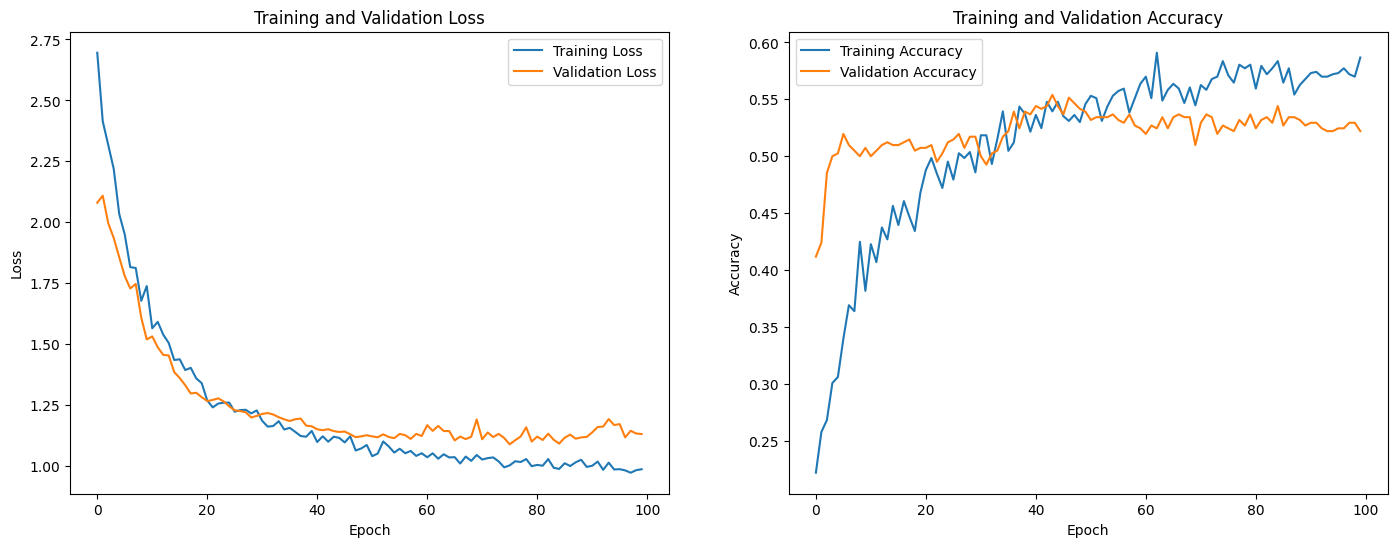

In [42]:
plt.figure(figsize=(17, 6))
#plot graph for Acuuracy and loss
plt.subplot(1, 2, 1)
plt.plot(historynew.history['loss'], label='Training Loss')
plt.plot(historynew.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historynew.history['accuracy'], label='Training Accuracy')
plt.plot(historynew.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

**Observations :**
- A final test accuracy of 81.82% was attained by us after we experimented with training a neural network with dense hidden layers of varying numbers of units.
- We also observe that our model starts overfitting our data as soon as we pass some threshold, as we can observe from the above plots, where validation accuracy starts to decrease and validation loss starts to rise.
- As a result, we can differentiate between the various digits in this dataset with this level of precision.


